In [5]:
import tensorflow as tf

In [6]:
print("Versión de TensorFlow:", tf.__version__)

# Verificar si TensorFlow está utilizando GPU
print("TensorFlow se está ejecutando con GPU:", tf.config.list_physical_devices('GPU'))

# Verificar la versión de CUDA
print("Versión de CUDA utilizada por TensorFlow:", tf.test.is_built_with_cuda())

Versión de TensorFlow: 2.15.0
TensorFlow se está ejecutando con GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Versión de CUDA utilizada por TensorFlow: True


In [7]:
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU') , len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 1


In [9]:
# Obtener la lista de dispositivos disponibles
devices = tf.config.experimental.list_physical_devices('GPU')

# Verificar si hay al menos una GPU disponible
if len(devices) > 0:
    print("GPU disponible: ", devices[0])
    # Configurar TensorFlow para usar la GPU
    tf.config.experimental.set_visible_devices(devices[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(devices), "GPU lógica disponible: ", len(logical_gpus))
else:
    print("No se encontraron GPUs disponibles.")

GPU disponible:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 GPU lógica disponible:  1


In [10]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [12]:
class_names = ['Camiseta','Pantalón','Suéter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla deportiva','Bolso','Botines']

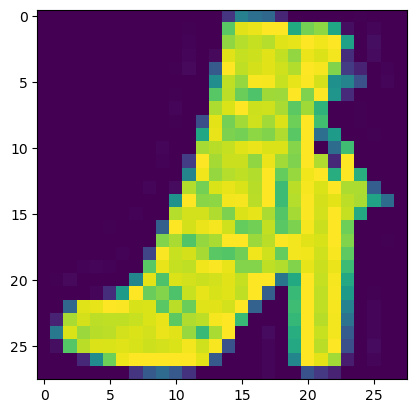

Botines
(28, 28)


In [13]:
plt.imshow(train_images[11])
plt.grid(False)
plt.show()
print(class_names[train_labels[11]])
print(train_images[11].shape)

In [14]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(150, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer = 'adadelta',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119260 (465.86 KB)
Trainable params: 119260 (465.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(train_images,train_labels, batch_size=12, epochs=10)

Epoch 1/10


2024-04-24 18:20:09.292247: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2c8fc43900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 18:20:09.292283: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-24 18:20:09.313791: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-24 18:20:09.365671: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1713997209.454769   25277 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5000/5000 [==============================] - 15s 3ms/step - loss: 71.5598 - accuracy: 0.3155
Epoch 2/10
5000/5000 [==============================] - 14s 3ms/step - loss: 27.0358 - accuracy: 0.4907
Epoch 3/10
5000/5000 [==============================] - 14s 3ms/step - loss: 20.6634 - accuracy: 0.5585
Epoch 4/10
5000/5000 [==============================] - 13s 3ms/step - loss: 17.4759 - accuracy: 0.5996
Epoch 5/10
5000/5000 [==============================] - 13s 3ms/step - loss: 15.4451 - accuracy: 0.6265
Epoch 6/10
5000/5000 [==============================] - 13s 3ms/step - loss: 14.0071 - accuracy: 0.6471
Epoch 7/10
5000/5000 [==============================] - 13s 3ms/step - loss: 12.9471 - accuracy: 0.6627
Epoch 8/10
5000/5000 [==============================] - 13s 3ms/step - loss: 12.1216 - accuracy: 0.6751
Epoch 9/10
5000/5000 [==============================] - 13s 3ms/step - loss: 11.4567 - accuracy: 0.6849
Epoch 10/10
5000/5000 [==============================] - 13s 3ms/step - los